In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
data = [[0.2,3.4],[0.4,3.8],[0.6,4.2],[0.8,4.6]] 
data

[[0.2, 3.4], [0.4, 3.8], [0.6, 4.2], [0.8, 4.6]]

In [3]:
data_x=[]
data_y=[]
for i in range(len(data)):
  data_x.append(data[i][0])
  data_y.append(data[i][1])
data_x=np.array(data_x)
data_y=np.array(data_y)

In [4]:
max_iters=10000
m=1.0
c=-1.0
Em=0.0
Ec=0.0
alpha=0.1
exp=10**(-8)
dm=0.0
dc=0.0
iter=1
error=[]
moment = 0.9

In [5]:

while (iter<=max_iters):
  err=0.0
  for i in range(4):
    gm=-1*(data_y[i]-(m*data_x[i])-c)*data_x[i]
    gc=-1*(data_y[i]-(m*data_x[i])-c)
    err+=(data_y[i]-m*data_x[i]-c)**2
    Em = moment*Em + (1-moment)*(gm**2)
    Ec = moment*Ec + (1-moment)*(gc**2)
    r1 = math.sqrt(Em + exp)
    r2 = math.sqrt(Ec + exp)
    dm = -1*(alpha/r1)*gm
    dc = -1*(alpha/r2)*gc
    m = m + dm
    c = c + dc
  error.append(err/8)
  iter=iter+1
print("m=",m,"\nc=",c)

m= 2.023899171951446 
c= 2.9983498001272957


In [6]:
ms=0
for i in range(4):
  ms+=(data_y[i]-(m*data_x[i])-c)**2
ms=ms/4
print("Mean Square Error:",ms)

Mean Square Error: 0.00013463587509730026


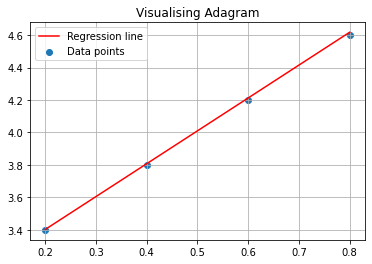

In [7]:
plt.scatter(data_x,data_y,label="Data points")
plt.plot(data_x,m*data_x+c,color='red',label="Regression line")
plt.title("Visualising Adagram")
plt.grid()
plt.legend()
plt.show()

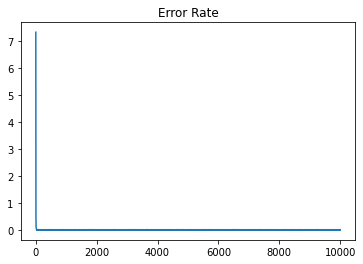

In [8]:
iters=np.arange(max_iters)
plt.plot(iters,error)
plt.title("Error Rate")
plt.show()